# Introduction

### Credit Card is a financial instrument issued by banks with a pre-set credit limit, helping you make cashless transactions.A top focus for the bank has always been acquiring new credit card customers.Many customers apply for credit card, Bank credit card department use these features given in the credit card approval dataset for give the credit card to their customers.

- Gender: customer is male or female
- Car_Owner: customer have car or not
- Annual_Income: customers annual income of 1 year
- Property_Owner: customer having property or not
- Type_Income: which type of income customer have
- Education: customers Education
- Marital_status: customer is married or not
- Housing_Type: which type of house customer living
- Employed_Days: Employed days of customer
- Type_Occupation: which type of occupation customer involved
- Family_Members: Family size of a customer
- Label: 0 is for approved and 1 is for rejected

# Aim:
- Performing necessary feature engineering step to clean and modify the data.
- Predicitng credit card approval to the customer using a machine learning model

### Importing Necessary librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing and reading the data

In [2]:
#Load the dataset

creditData=pd.read_csv("Credit_card.csv")

In [3]:
creditData.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
# Loading another dataset

creditLabel=pd.read_csv("Credit_card_label.csv")

In [5]:
creditLabel.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [6]:
# Merge two dataset bassed on Ind_ID column

data=pd.merge(creditData,creditLabel)

In [7]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [8]:
data.shape

(1548, 19)

 In this dataset 1548 observations and 19 columns

In [9]:
# Rename the columns name
data.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_Owner','CHILDREN':'Children','Annual_income':'Annual_Income',
                      'EDUCATION':'Education','Marital_status':'Marital_Status','Housing_type':'Housing_Type','Birthday_count':
                      'Birthday_Count','Employed_days':'Employed_Days','EMAIL_ID':'Email_Id','Mobile_phone':'Mobile_Phone','label':'Label'},inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In this dataset 8 column have catagorical values and 11 column have Numerical value and some column have missing values.

In [11]:
# see all the statistical values
data.describe()

,Ind_ID,Children,Annual_Income,Birthday_Count,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_Id,Family_Members,Label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [12]:
data["Label"].unique()

array([1, 0], dtype=int64)

In [13]:
data["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [14]:
data["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [15]:
data["Type_Income"].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [16]:
data["Education"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [17]:
data["Housing_Type"].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [18]:
data["Marital_Status"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [19]:
data.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label'],
      dtype='object')

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(1548, 19)

In this data has no Duplicates Values

# Dealing with missing values or null values

In [22]:
data.isnull().sum()

Ind_ID               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

Here 4 columns having missing values

In [23]:
# checking null values in percentage wise
data.isna().mean()*100

Ind_ID              0.000000
Gender              0.452196
Car_Owner           0.000000
Property_Owner      0.000000
Children            0.000000
Annual_Income       1.485788
Type_Income         0.000000
Education           0.000000
Marital_Status      0.000000
Housing_Type        0.000000
Birthday_Count      1.421189
Employed_Days       0.000000
Mobile_Phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email_Id            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
Label               0.000000
dtype: float64

In [24]:
# Here 3 columns having very low missing values so we can drop these
cleaned_data=data.dropna(subset=["Gender","Annual_Income","Birthday_Count"],inplace=True)

In [25]:
data.isnull().sum()

Ind_ID               0
Gender               0
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income        0
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count       0
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    471
Family_Members       0
Label                0
dtype: int64

In [26]:
data["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'High skill tech staff', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [27]:
# replace all the null values with others 

data["Type_Occupation"]=data["Type_Occupation"].replace(np.nan,"Others")

In [28]:
data["Type_Occupation"].unique()

array(['Others', 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'High skill tech staff', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [29]:
data.isnull().sum()

Ind_ID             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

No we have no missing values

In [30]:
data.drop(["Ind_ID","Mobile_Phone"],axis=1,inplace=True)

In [31]:
data.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Others,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Others,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Others,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Others,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,0,0,0,Others,2,1


In [32]:
# Birthday value is in number of days so we convert days to age 
data['Birthday_Count']=np.ceil(pd.to_timedelta(data['Birthday_Count'],unit='D').dt.days/-365.25)

In [33]:
# here also Employed days is in numbers we convert it to years and here positive number means customer is not employed
data.loc[(data['Employed_Days']>0),'Employed_Days']=0

In [34]:
data['Employed_Days']=np.ceil(pd.to_timedelta(data['Employed_Days'],unit='D').dt.days / -365.25)

In [35]:
data.rename(columns={"Birthday_Count":"Age","Employed_Days":"Employed_Year"},inplace=True)

In [36]:
data.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Age,Employed_Year,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,52.0,-0.0,0,0,0,Others,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,-0.0,0,0,0,Others,2,1


# Dealing with Outlier

### Annual Income

<Axes: xlabel='Annual_Income'>

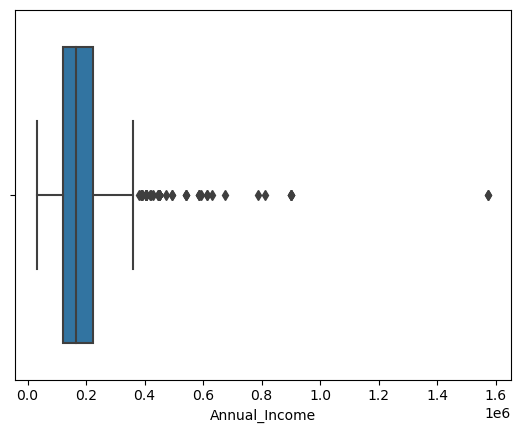

In [37]:
sns.boxplot(x=data["Annual_Income"])

## Here using IQR to remove outlier

In [38]:
Q1=data["Annual_Income"].quantile(0.25)
Q3=data["Annual_Income"].quantile(0.75)
print("Q3 : ",Q3)
print("Q1 : ",Q1)
IQR=Q3-Q1
print("IQR : ",IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper_Bound : ",upper_bound)
print("Lower_Bound : ",lower_bound)

Q3 :  225000.0
Q1 :  121050.0
IQR :  103950.0
Upper_Bound :  380925.0
Lower_Bound :  -34875.0


In [39]:
data=data[data["Annual_Income"]<upper_bound]
data=data[data["Annual_Income"]>lower_bound]

<Axes: xlabel='Annual_Income'>

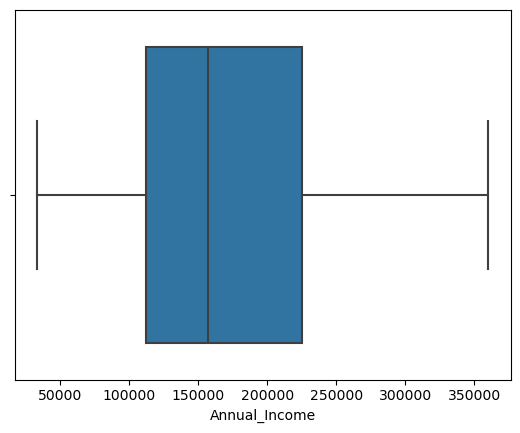

In [40]:
sns.boxplot(x=data["Annual_Income"])

### Age

<Axes: xlabel='Age'>

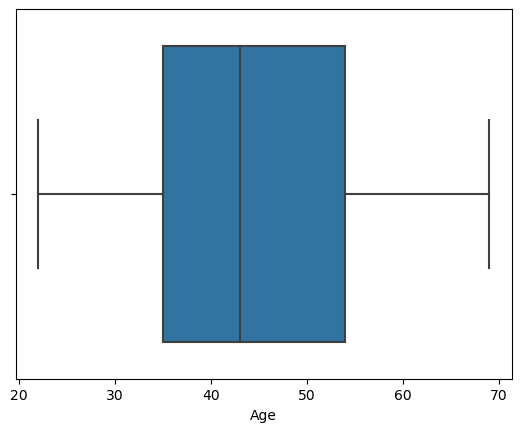

In [41]:
sns.boxplot(x=data["Age"])

### Employed Year

<Axes: xlabel='Employed_Year'>

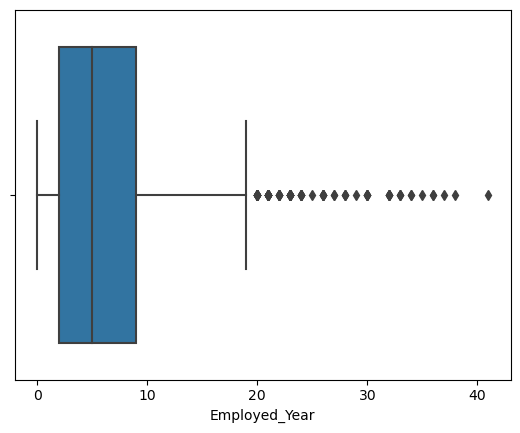

In [42]:
sns.boxplot(x=data["Employed_Year"])

In [43]:
Q1=data["Employed_Year"].quantile(0.25)
Q3=data["Employed_Year"].quantile(0.75)
print("Q3 : ",Q3)
print("Q1 : ",Q1)
IQR=Q3-Q1
print("IQR : ",IQR)
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print("Upper Bound : ",upper_bound)
print("Lower Bound : ",lower_bound)

Q3 :  9.0
Q1 :  2.0
IQR :  7.0
Upper Bound :  19.5
Lower Bound :  -8.5


In [44]:
data=data[data["Employed_Year"]<upper_bound]
data=data[data["Employed_Year"]>lower_bound]

<Axes: xlabel='Employed_Year'>

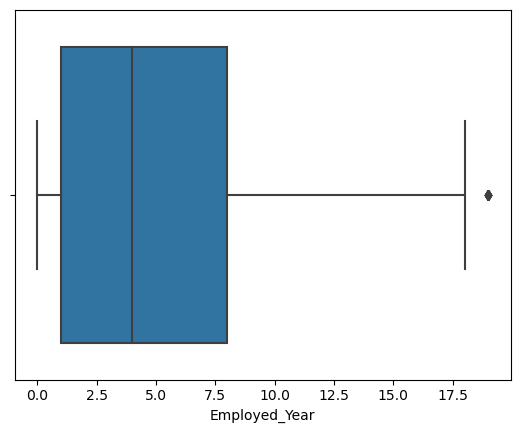

In [45]:
sns.boxplot(x=data["Employed_Year"])

# Exploratory Data Analysis (EDA)

In [46]:
data.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Age,Employed_Year,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,52.0,-0.0,0,0,0,Others,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,38.0,2.0,1,1,0,Others,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,-0.0,0,0,0,Others,2,1


In [47]:
# Rename some row values with appropiate names

data['Housing_Type']=data['Housing_Type'].replace('House / apartment','House')
data['Education']=data['Education'].replace('Secondary / secondary special','Secondary')
data['Marital_Status']=data['Marital_Status'].replace('Single / not married','Single')
data['Type_Occupation']=data['Type_Occupation'].replace('Waiters/barmen staff','Waiters')

## Gender

In [48]:
data["Gender"].value_counts()

F    849
M    487
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

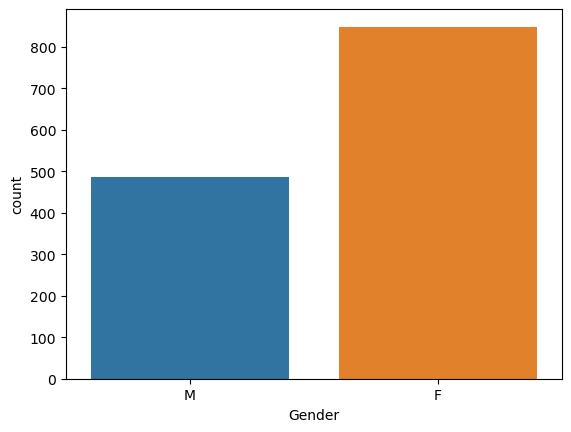

In [49]:
sns.countplot(x=data["Gender"])

#### NOTE:-  Maximum Number of Credit Card customers are Female and very less number of people are Male.

## Car Owner

In [50]:
data["Car_Owner"].value_counts()

N    809
Y    527
Name: Car_Owner, dtype: int64

<Axes: xlabel='Car_Owner', ylabel='count'>

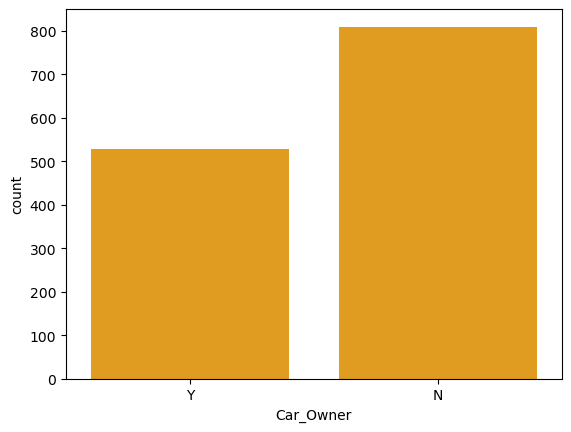

In [51]:
sns.countplot(x=data["Car_Owner"],color="orange")

#### NOTE :- Most of the customer not having Cars.

## Property Owner

In [52]:
data["Property_Owner"].value_counts()

Y    868
N    468
Name: Property_Owner, dtype: int64

<Axes: xlabel='Property_Owner', ylabel='count'>

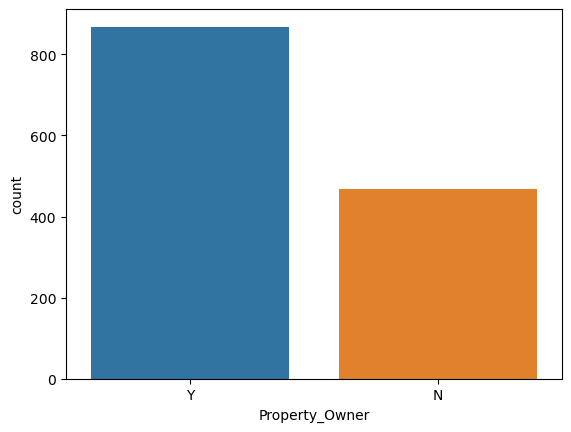

In [53]:
sns.countplot(x=data["Property_Owner"])

#### NOTE :- Most of the customers have their own Property.

## Children

In [54]:
data["Children"].value_counts()

0     950
1     254
2     116
3      15
14      1
Name: Children, dtype: int64

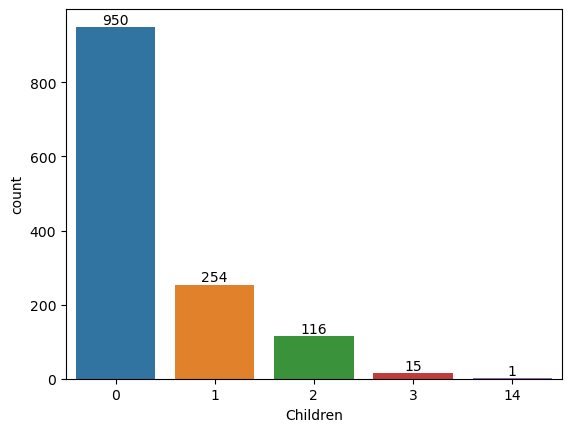

In [55]:
ax=sns.countplot(x="Children" ,data=data)

for bars in ax.containers:
    ax.bar_label(bars)

#### NOTE :- Most of the customers have not their any children.

## Annual Income

<Axes: xlabel='Annual_Income', ylabel='Count'>

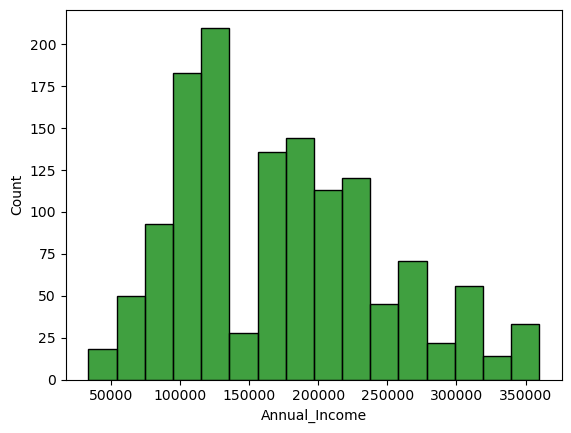

In [56]:
sns.histplot(x=data["Annual_Income"],color="g")

#### NOTE :- Most of the Annual Income laid between 100000 to 150000.

## Avg Annual Income based on Label

In [57]:
avg_annual_income=data.groupby('Label')['Annual_Income'].mean()
avg_annual_income

Label
0    175820.376769
1    161366.666667
Name: Annual_Income, dtype: float64

<Axes: xlabel='Label'>

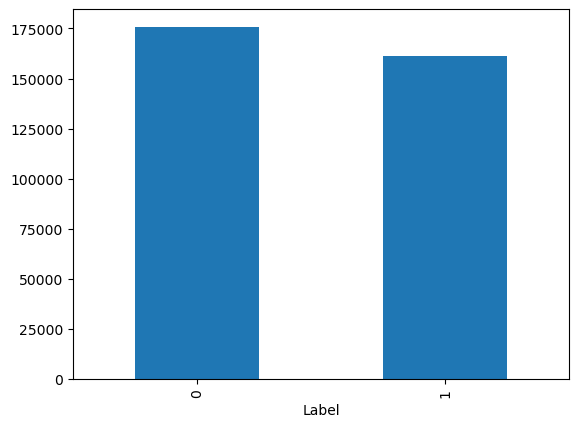

In [58]:
fig, ax = plt.subplots()
avg_annual_income.plot(kind='bar', ax=ax)

#### NOTE :- Here Customers credit card application is approved and whose application is rejected there annual income difference is very low, so we say annual income does not play a major role for application approval or rejection.

## Avg Annual Income based on Type of Income

In [59]:
avg_income=data.groupby("Type_Income")["Annual_Income"].mean()*100
avg_income

Type_Income
Commercial associate    1.969055e+07
Pensioner               1.439116e+07
State servant           1.924535e+07
Working                 1.730075e+07
Name: Annual_Income, dtype: float64

<Axes: xlabel='Type_Income'>

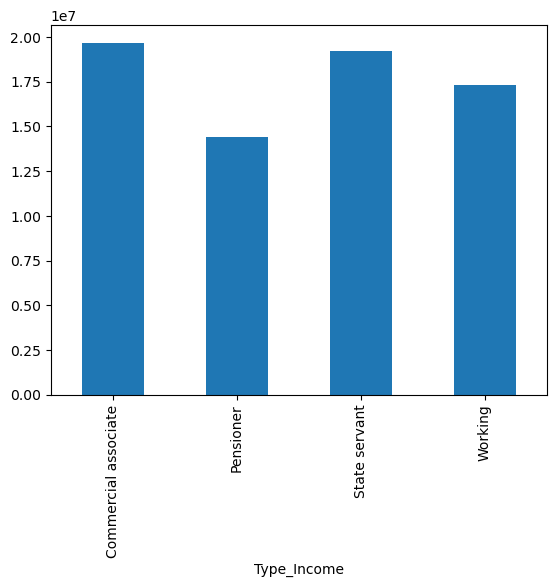

In [60]:
fig, ax=plt.subplots()
avg_income.plot(kind="bar")

#### NOTE :- Here Customers are working as a Commercial associate and state servant their annual income is higher than other type of working customers and pensioners.

## Education

In [61]:
data["Education"].value_counts()

Secondary            901
Higher education     351
Incomplete higher     62
Lower secondary       21
Academic degree        1
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

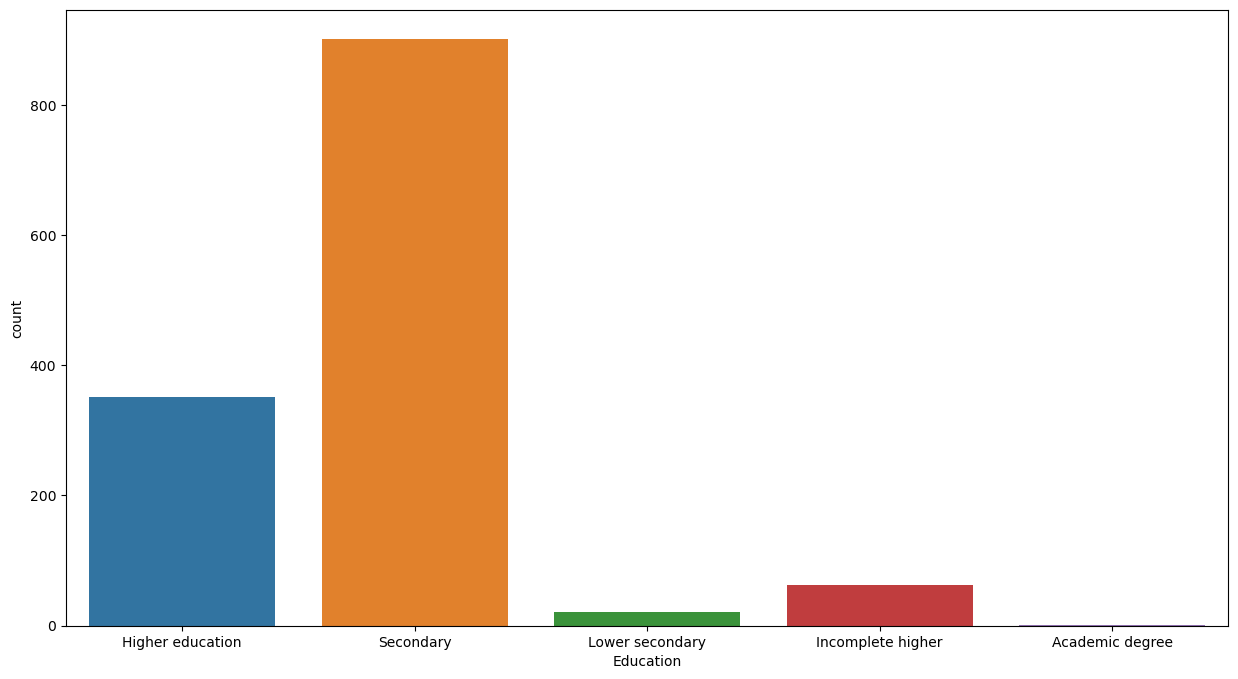

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(x=data["Education"])

#### NOTE :- Most number of customers education is Secondary level and Higher Education and very less number of customer have academic degree

## Marital Status

In [63]:
data["Marital_Status"].value_counts()

Married           909
Single            185
Civil marriage     92
Separated          78
Widow              72
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

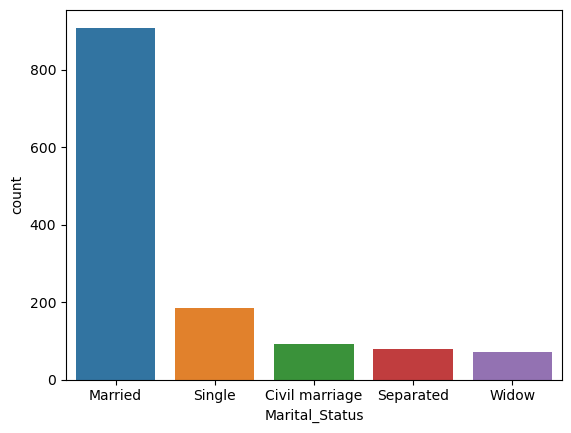

In [64]:
sns.countplot(x=data["Marital_Status"])

#### NOTE :- Maximum Number of Credit Card customers are married and very less number of people are widow and separated.

## Housing Type

In [65]:
data["Housing_Type"].value_counts()

House                  1190
With parents             71
Municipal apartment      47
Rented apartment         19
Office apartment          6
Co-op apartment           3
Name: Housing_Type, dtype: int64

<Axes: xlabel='Housing_Type', ylabel='count'>

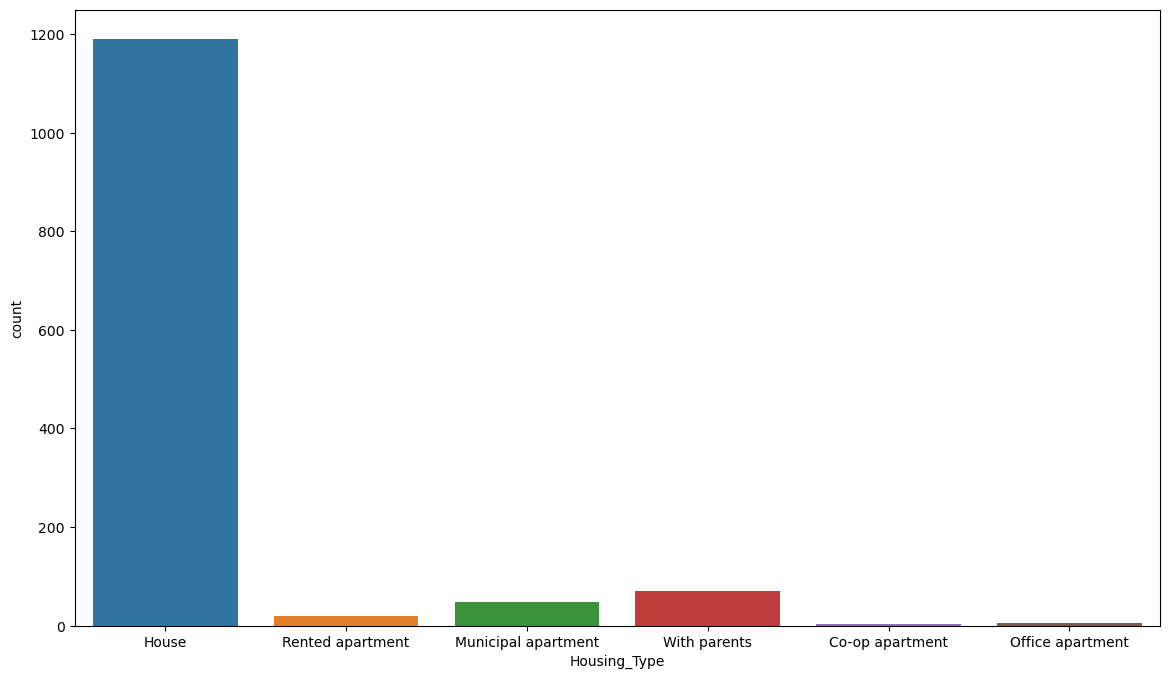

In [66]:
plt.figure(figsize=(14,8))
sns.countplot(x=data["Housing_Type"])

#### Note :- Maximum number of people have their own House and very less people lives in Co-operative apartment and office apartment.

## Avg Ages of Gender

In [67]:
avg_age_gender=data.groupby('Gender')['Age'].mean()
avg_age_gender

Gender
F    45.762073
M    41.336756
Name: Age, dtype: float64

Text(0.5, 1.0, 'Average Age of Customers based on Gender')

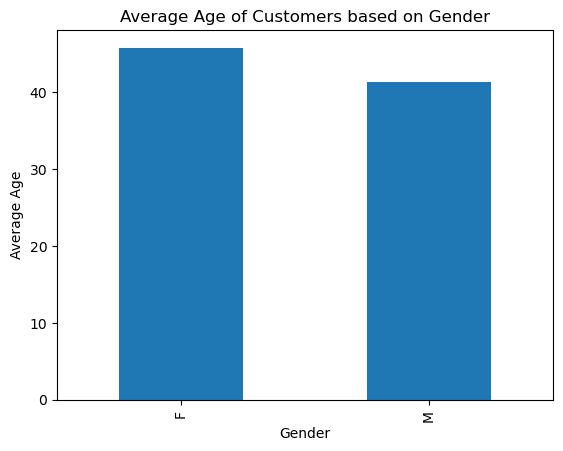

In [68]:
fig, ax = plt.subplots()
avg_age_gender.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Age')
ax.set_title('Average Age of Customers based on Gender')

#### NOTE :- Female customers average age is higher than male customer so we can say female customers are older more than male customers.

## Family Members

In [69]:
data["Family_Members"].value_counts()

2     696
1     286
3     228
4     111
5      14
15      1
Name: Family_Members, dtype: int64

<Axes: xlabel='Family_Members', ylabel='count'>

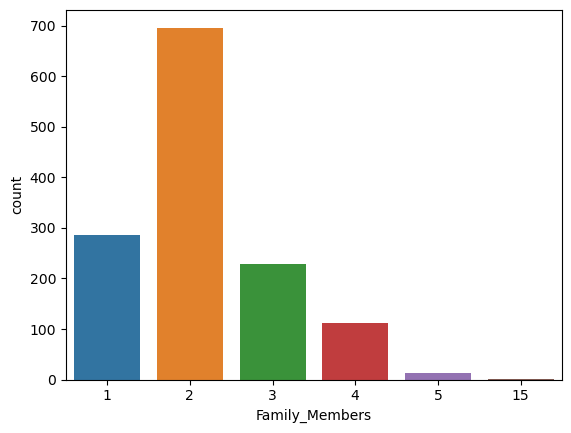

In [70]:
sns.countplot(x=data["Family_Members"])

#### NOTE :- maximum number of the customers family member is 2, normaly most of the customers family member is 1 to 4 and very few customer have big family size.

## Label

In [71]:
data["Label"].value_counts()

0    1201
1     135
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

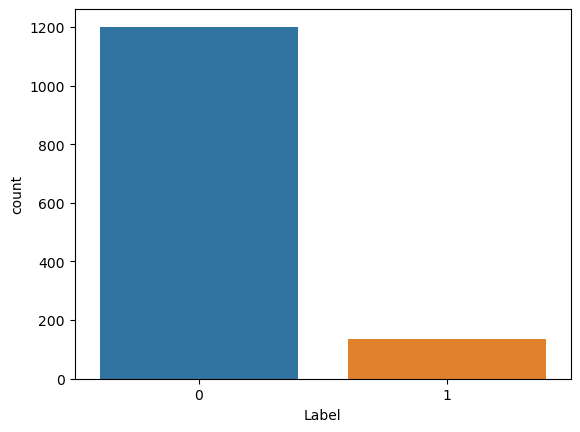

In [72]:
sns.countplot(x=data["Label"])

# Save the clean dataset

In [67]:
# give path to load the dataset
file_path="C:\\Users\\DELL\\Downloads\\credit_data.csv"

In [69]:
# save it as a csv file
data.to_csv(file_path, index=False)

In [70]:
for col in data.describe(include="object").columns:
    print(col)
    print(data[col].unique())
    print(" _"*20)

Gender
['M' 'F']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Car_Owner
['Y' 'N']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Property_Owner
['Y' 'N']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Type_Income
['Pensioner' 'Commercial associate' 'Working' 'State servant']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Education
['Higher education' 'Secondary' 'Lower secondary' 'Incomplete higher'
 'Academic degree']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Marital_Status
['Married' 'Single' 'Civil marriage' 'Separated' 'Widow']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Housing_Type
['House' 'Rented apartment' 'Municipal apartment' 'With parents'
 'Co-op apartment' 'Office apartment']
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Type_Occupation
['Others' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'Cleaning staff' 'Drivers' 'Low-skill Laborers' 'High skill tech staff'
 'IT staff' 'Managers' 'Waiters' 'Core staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 '

 ## Now encoding categorical variables by Label Encoder

In [71]:
# Importing Label Encoder from sklearn

from sklearn.preprocessing import LabelEncoder

### Performing Label Encoder

In [72]:
data[["Gender","Car_Owner","Property_Owner","Type_Income","Education",
      "Marital_Status","Housing_Type","Type_Occupation"]]=data[["Gender","Car_Owner","Property_Owner",
             "Type_Income","Education","Marital_Status","Housing_Type","Type_Occupation"]].apply(LabelEncoder().fit_transform)

In [73]:
data.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Age,Employed_Year,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,1,1,1,0,180000.0,1,1,1,1,52.0,-0.0,0,0,0,12,2,1
1,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2,1
4,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2,1
6,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2,1
7,0,0,0,0,180000.0,1,4,1,1,61.0,-0.0,0,0,0,12,2,1


- Gender (M = 1, F = 0)
- Car Owner (Y = 1, N = 0)
- Property Owner (Y =1, N = 0)
- Type Income (Commercial associate = 0, Pensioner = 1, State servant = 2, Working = 3)
- Education (Academic degree = 0, Higher education 1, Incomplete higher = 2, Lower secondary = 3, Secondary = 4)
- Marital Status (Civil marriage = 0, Married = 1, Separated = 2, Single = 3, Widow = 4)
- Housing Type (Co-op apartment = 0, House = 1, Municipal apartment = 2, Office apartment = 3, Rented apartment = 4, With parents = 5)

- Type Occupation (Accountants = 0, Cleaning staff = 1, Cooking staff = 2, Core staff = 3, Drivers = 4, HR staff = 5, High skill tech staff = 6, IT staff = 7, Laborers = 8, Low-skill Laborers = 9, Managers = 10, Medicine staff = 11, Others = 12, Private service staff = 13, Realty agents = 14, Sales staff = 15, Secretaries = 16, Security staff = 17, Waiters = 18)

In [74]:
approved=data[data["Label"]==0]
rejected=data[data["Label"]==1]

In [75]:
approved=approved.shape
approved

(1201, 17)

In [76]:
rejected=rejected.shape
rejected

(135, 17)

In [77]:
135/1201

0.11240632805995004

Here 11 % data is Rejected and 89% data is Approved.

## Spliting dependent and independent features

In [78]:
X=data.drop(["Label"],axis=1)

In [79]:
X.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Age,Employed_Year,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,52.0,-0.0,0,0,0,12,2
1,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2
4,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2
6,0,1,0,0,315000.0,0,1,1,1,38.0,2.0,1,1,0,12,2
7,0,0,0,0,180000.0,1,4,1,1,61.0,-0.0,0,0,0,12,2


In [80]:
Y=data["Label"]

In [81]:
Y.head()

0    1
1    1
4    1
6    1
7    1
Name: Label, dtype: int64

## Train Test Split Importing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=2)

In [84]:
X_train.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Age,Employed_Year,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members
775,0,0,0,0,76500.0,1,4,1,1,64.0,-0.0,0,1,0,12,2
607,0,0,1,0,157500.0,1,4,1,1,63.0,-0.0,0,1,0,12,2
1221,0,1,1,2,135000.0,3,4,1,1,34.0,1.0,0,0,1,4,4
1276,0,0,1,0,292500.0,1,4,3,1,62.0,-0.0,0,0,0,12,1
255,0,0,1,0,157500.0,3,4,1,1,58.0,5.0,0,0,0,8,2


In [85]:
y_train.head()

775     0
607     0
1221    0
1276    0
255     0
Name: Label, dtype: int64

## Transformation (StandardScaler)

In [86]:
# Importing StandardScaler

from sklearn.preprocessing import StandardScaler

In [87]:
sc=StandardScaler()
sc

StandardScaler()

In [88]:
X_train=sc.fit_transform(X_train)
X_train

array([[-0.747746  , -0.81140933, -1.35941164, ..., -0.31246788,
         0.67391542, -0.16376859],
       [-0.747746  , -0.81140933,  0.73561236, ..., -0.31246788,
         0.67391542, -0.16376859],
       [-0.747746  ,  1.2324236 ,  0.73561236, ...,  3.20032893,
        -1.20960873,  1.89393557],
       ...,
       [ 1.33735251,  1.2324236 , -1.35941164, ..., -0.31246788,
         0.67391542, -0.16376859],
       [-0.747746  , -0.81140933,  0.73561236, ..., -0.31246788,
        -0.26784666, -0.16376859],
       [-0.747746  ,  1.2324236 ,  0.73561236, ...,  3.20032893,
         0.67391542, -0.16376859]])

In [89]:
X_test=sc.fit_transform(X_test)
X_test

array([[-0.79633306, -0.79009014,  0.72899148, ..., -0.29158231,
         0.69279613, -0.20751723],
       [-0.79633306, -0.79009014,  0.72899148, ...,  3.42956335,
        -0.32876845, -1.34250945],
       [-0.79633306,  1.26567837, -1.37175815, ..., -0.29158231,
        -1.60572417, -0.20751723],
       ...,
       [-0.79633306, -0.79009014, -1.37175815, ...,  3.42956335,
        -1.60572417, -0.20751723],
       [-0.79633306, -0.79009014, -1.37175815, ..., -0.29158231,
        -1.60572417, -0.20751723],
       [-0.79633306, -0.79009014, -1.37175815, ..., -0.29158231,
        -0.32876845,  2.0624672 ]])

# Building Algorithm

- Because this data set outcomes or dependent feature has categorical values and i converted it into numeric so it become binary outcomes and this type of outcome comes under **Classifcation** problem so we building algorithm like - **Logistic Regression,Decision Tree,Random Forest and Xg Boost**

# 1. Logistic Regression

In [90]:
# Importing Librairy
from sklearn.linear_model import LogisticRegression

In [91]:
# fitting logistic regression model
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

## Prediction

In [92]:
log_reg_pred=log.predict(X_test)
log_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

## To checking accuracy using accuracy_score

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score

In [94]:
print("ACCURACY : ",round(accuracy_score(y_test,log_reg_pred),2))

ACCURACY :  0.91


#### **Insights**:
- We can see here that the accuracy from Logistic Regression model is 91%.
- Now let us check with other models too

# 2. Decision Tree

In [95]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [96]:
# Create Decisiom Tree Classifier Object
classifier=DecisionTreeClassifier()

# Train Decision Tree Classifier
classifier=classifier.fit(X_train,y_train)
classifier

DecisionTreeClassifier()

## Prediction

In [97]:
dec_pred=classifier.predict(X_test)
dec_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

### Accuracy checking by Decision Tree

In [98]:
print("Accuracy score by Decision tree : ",round(accuracy_score(y_test, dec_pred), 2))

Accuracy score by Decision tree :  0.86


#### Insights : 
- In Decision Tree Algorithm, we can see that Accuracy is 86% which is 5% lower than Logistic Regression model

# 3. Random Forest

In [99]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
# Create Random Forest Classifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")  # entropy gives range b/w 0-1

# Train Random Forest Classifier
rf=classifier.fit(X_train,y_train)
rf

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Prediction

In [101]:
rf_pred=rf.predict(X_test)
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

### Accuracy checking by Random Forest

In [102]:
print("Accuracy of Random Forest Model : ",round(accuracy_score(y_test, rf_pred), 2))

Accuracy of Random Forest Model :  0.93


#### Insights :
- In Random Forest Algorithm, we can see that Accuracy is 93%.

# 4. XG Boost

In [103]:
# importing libraries
import xgboost as xgb

In [104]:
# fitting xgb model
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
## Prediction

In [106]:
pred_xg = xg_clf.predict(X_test)
pred_xg

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### Accuracy checking by XGBoost

In [107]:
print("Accuracy of XG Boost Model : ",round(accuracy_score(y_test, pred_xg), 2))

Accuracy of XG Boost Model :  0.93


#### Insights :
- In XGBoost Algorithm, we can see that Accuracy is 93%.

# Conclusion :

- After testing data from different algorithms. I have came to the conclusion that **Decision Tree Classifier** gives us the least accuracy i.e. 85% ,**Logistic Regression** 91%,**Random Forest algorithm**, and **XGBoost** gives us an accuracy of 93%, So XGBoost and Random Forest algorithm model is may be the best model in this senario.